In [2]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math   
from scipy import stats as st

In [4]:
training_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

#EDA

In [5]:
training_set.isna().sum()

x    0
y    1
dtype: int64

In [6]:
test_set.isna().sum()

x    0
y    0
dtype: int64

In [11]:
training_set = training_set.dropna() 

In [12]:
training_set.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [9]:
test_set.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


Separamos los conjuntos en 4

In [13]:
x_train = np.array(training_set.iloc[:, :-1].values)
y_train = np.array(training_set.iloc[:, 1].values)

In [14]:
x_test = np.array(test_set.iloc[:, :-1].values)
y_test = np.array(test_set.iloc[:, 1].values)

In [16]:
training_set.head(20)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [22]:
test_set.head(20)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


#Aplicar modelo de Regresión Lineal

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:

#En los modelos de regresión, el accuracy equivale a calcular r2 score. 

accuracy = model.score(x_test,y_test)
print('Accuracy: '+str(accuracy))



Accuracy: 0.9888014444327563


In [24]:
y_pred = model.predict(x_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: '+ str(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: '+ str(r2_score(y_test, y_pred)))

Coefficients: 
 [1.00065638]
Mean squared error: 9.432922192039305
Coefficient of determination: 0.9888014444327563


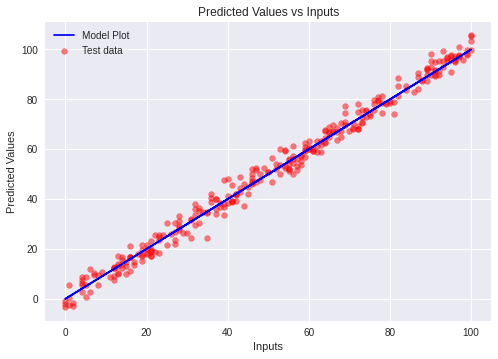

In [21]:
plt.style.use('seaborn')
plt.scatter(x_test, y_test, color = 'red', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')
plt.plot(x_train, model.predict(x_train), color = 'blue', label='Model Plot')
plt.title('Predicted Values vs Inputs')
plt.xlabel('Inputs')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()